# Introduction

By exposing sample to electron beam, we can measure electrons inelastic scattering energy loss by identifying resonant collisions resulting in molecular vibrational levels excitations. Vibrational levels, up to a first anharmonic term, can be described as:

\begin{equation}
E_n = \hbar \omega (n + \frac{1}{2}) - \hbar \omega X (n + \frac{1}{2}) ^ 2
\end{equation}

# Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

import plotly.plotly as pl
from plotly import tools
from plotly import graph_objs as go
from plotly.offline import plot, init_notebook_mode, iplot

In [2]:
data_1 = pd.read_csv("../data/Ascii1.dat", header=None, sep="\t").rename({0: "e", 1: "n"}, axis=1)
data_2 = pd.read_csv("../data/Ascii2.dat", header=None, sep="\t").rename({0: "e", 1: "n"}, axis=1)

In [3]:
e_1 = data_1.e.values
n_1 = data_1.n.values

e_2 = data_2.e.values
n_2 = data_2.n.values

In [4]:
idx_1 = np.where((e_1 < 2.7) & (e_1 > 1.3))
idx_2 = np.where(n_2 > 20)

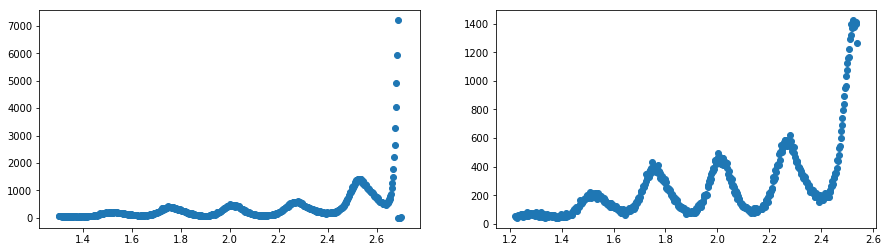

In [5]:
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(15)

ax[0].scatter(e_1[idx_1], n_1[idx_1])
ax[1].scatter(e_2[idx_2], n_1[idx_2])

In [6]:
n1 = np.linspace(1, 5, 5)
n2 = np.linspace(1, 5, 5)

e1 = np.array([1.510, 1.763, 2.005, 2.275, 2.531])
e2 = np.array([1.292, 1.570, 1.838, 2.117, 2.402])

In [7]:
n1

array([1., 2., 3., 4., 5.])

In [8]:
def energy(n, *args):
    return args[0] * (n + .5) - args[0] * args[1] * (n + .5) ** 2

In [9]:
init_notebook_mode(True)

trace_1 = go.Scatter(x=e_1[idx_1], y=n_1[idx_1], mode='markers')
trace_2 = go.Scatter(x=e_2[idx_2], y=n_2[idx_2], mode='markers')

fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)

fig['layout'].update(height=600, width=800, title='Vibrational spectra')
#iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Layout({
    'height': 600,
    'title': {'text': 'Vibrational spectra'},
    'width': 800,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 1.0]}
})

In [10]:
popt_1, pcov_1 = curve_fit(energy, n1, e1, p0=[2e3, 5e-3], maxfev=8000)

In [11]:
popt_2, pcov_2 = curve_fit(energy, n2, e2, p0=[2e3, 5e-3], maxfev=8000)

In [12]:
corr = 1 / 1.23941 * 10 ** 4

In [13]:
h_bar_omega_1 = popt_1[0] * corr
d_h_bar_omega_1 = pcov_1[0, 0] * corr

h_bar_omega_x_1 = popt_1[1] * corr
d_h_bar_omega_x_1 = (popt_1[0] * pcov_1[1, 1] + 
                     popt_1[1] * pcov_1[0, 0] + 
                     2 * popt_1[1] * popt_1[0] * pcov_1[0, 1]) * corr

In [14]:
h_bar_omega_2 = popt_2[0] * corr
d_h_bar_omega_2 = pcov_2[0, 0] * corr

h_bar_omega_x_2 = popt_2[1] * corr
d_h_bar_omega_x_2 = (popt_2[0] * pcov_2[1, 1] + 
                     popt_2[1] * pcov_2[0, 0] + 
                     2 * popt_2[1] * popt_2[0] * pcov_2[0, 1]) * corr

In [15]:
h_bar_omega_1

7601.650809599039